In [4]:
###General Code First Box
import pandas as pd
import numpy as np
import scanpy as sc
import magpy as mp
import scipy.stats as stats
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

def sort_list_by_pctexp(adata, gene_list, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    pctexp = np.zeros((len(clusters),subset.shape[1]))
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        pctexp[i] = (subset2.layers['raw_normalized']>0).sum(axis=0).A1 / subset.shape[0]
    subset.var['pctmax'] = pctexp.max(axis=0)
    sorted_list = subset.var['pctmax'].sort_values(ascending=False).index.tolist()
    return sorted_list
def sort_list_by_mean(adata, gene_list, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    cmeans = np.zeros((len(clusters),subset.shape[1]))
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        cmeans[i] = subset2.layers['raw_normalized'].mean(axis=0).A1
    subset.var['cmeans'] = cmeans.max(axis=0)
    sorted_list = subset.var['cmeans'].sort_values(ascending=False).index.tolist()
    return sorted_list
def means_to_df(adata, gene_list, save=None, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    cmeans = {}
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        cmeans[cluster] = subset2.layers['raw_normalized'].mean(axis=0).A1
    df = pd.DataFrame(cmeans,index=gene_list)
    if save: df.to_csv(save)
    return df

combined_path = "/proj/magness/CDS010-014-015_combined/"

# sc.set_figure_params(dpi_save = 300, format = 'svg')
fig_path = combined_path+'drug-receptors'
sc.settings.figdir = fig_path

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



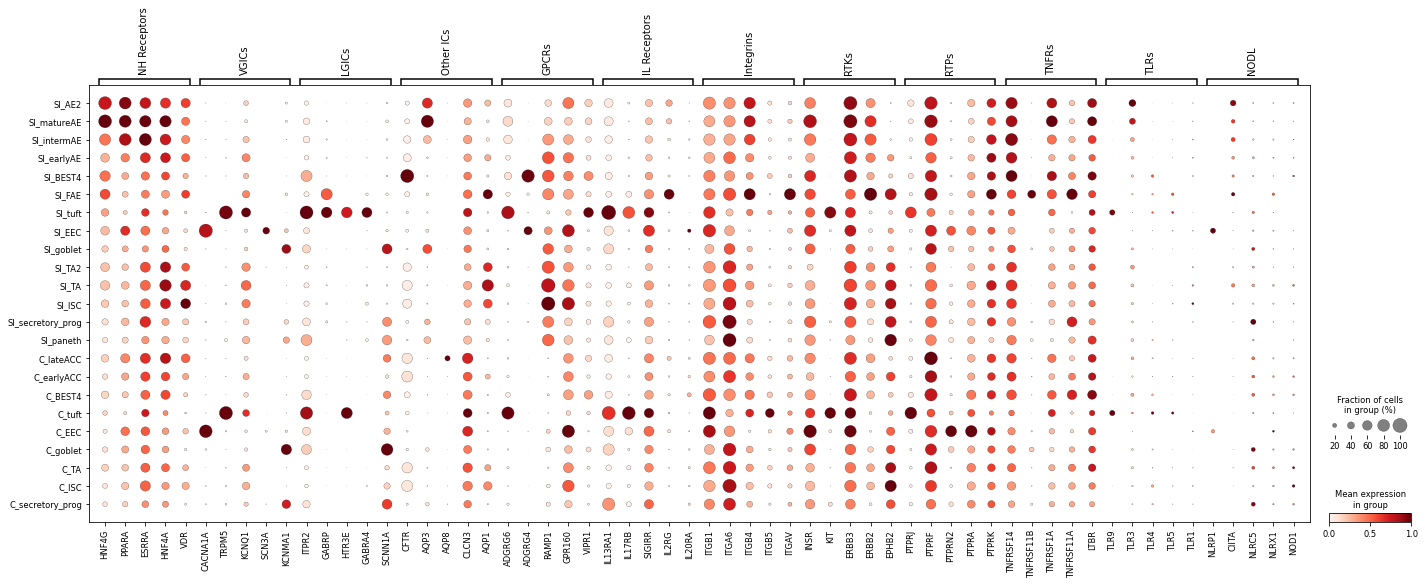

In [5]:
###Figure 15A
### Top 5 genes from each major receptor family by lineage
combined_path = "/proj/magness/CDS010-014-015_combined"
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")

subset = adata

Gene_dict = {
    'NH Receptors':['HNF4G',	'PPARA',	'ESRRA',	'HNF4A',	'VDR'],
    'VGICs':['CACNA1A',	'TRPM5',	'KCNQ1',	'SCN3A',	'KCNMA1'],
    'LGICs':['ITPR2',	'GABRP',	'HTR3E',	'GABRA4',	'SCNN1A'],
    'Other ICs':['CFTR', 'AQP3', 'AQP8', 'CLCN3', 'AQP1'],
    'GPCRs':['ADGRG6',	'ADGRG4',	'RAMP1',	'GPR160',	'VIPR1'],
    'IL Receptors':['IL13RA1', 'IL17RB', 'SIGIRR', 'IL2RG', 'IL20RA'],
    'Integrins':['ITGB1', 'ITGA6', 'ITGB4', 'ITGB5', 'ITGAV'],
    'RTKs':['INSR',	'KIT',	'ERBB3',	'ERBB2',	'EPHB2'],
    'RTPs':['PTPRJ', 'PTPRF', 'PTPRN2', 'PTPRA', 'PTPRK'],
    'TNFRs':['TNFRSF14', 'TNFRSF11B', 'TNFRSF1A', 'TNFRSF11A', 'LTBR'],
    'TLRs':['TLR9','TLR3','TLR4','TLR5','TLR1'],
    'NODL':['NLRP1','CIITA', 'NLRC5', 'NLRX1', 'NOD1']
}
subset = mp.scale_adata(subset, groupby = 'lineage')
subset.obs.lineage = subset.obs.lineage.cat.reorder_categories(['SI_AE2','SI_matureAE','SI_intermAE','SI_earlyAE', 'SI_BEST4','SI_FAE','SI_tuft','SI_EEC','SI_goblet','SI_TA2','SI_TA','SI_ISC', 'SI_secretory_prog','SI_paneth','C_lateACC', 'C_earlyACC','C_BEST4','C_tuft','C_EEC', 'C_goblet','C_TA','C_ISC', 'C_secretory_prog'])

sc.pl.dotplot(subset, var_names=Gene_dict, groupby = 'lineage', swap_axes=False, layer='raw_scaled')#,save='Top5ReceptReorder')
